## ***GAI 2024 Project1***

In [26]:
import sklearn

# 處理資料時會用到的工具

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# 儲存模型的工具
import pickle

# data frame
df = pd.read_csv('./data/467410-2022-08.csv')

## ***numpy 練習1***

In [27]:
# 設定總共類別
c = 10
# 模擬輸出 logits
x = np.random.rand(c)
# 輸出logits結果
print('logits結果：', x)

logits結果： [0.12347148 0.28540464 0.85919612 0.73810106 0.12532976 0.01332304
 0.91495444 0.30777427 0.59184644 0.83812959]


In [28]:
# 運算softmax結果
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()
# 輸出softmax結果
print('softmax結果：', softmax(x))

softmax結果： [0.06640442 0.0780771  0.13858561 0.12277988 0.06652793 0.05947852
 0.1465324  0.07984334 0.10607417 0.13569663]


## ***numpy練習2***

In [29]:
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5
# 輸出input
print('神經網路輸入：')
print(x)

神經網路輸入：
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [30]:
def ReLU(parameter):
   res = np.maximum(0, parameter)
   return res

Wx = np.matmul(W, x)
p = Wx + b
# 輸出output
print('神經網路輸出：')
print(ReLU(p))

神經網路輸出：
[[10.72611121]
 [16.5297252 ]
 [12.79284646]
 [ 1.19459298]
 [ 0.        ]
 [ 3.51935323]
 [ 5.66231275]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.11842641]
 [12.88349233]
 [15.47818179]
 [ 7.31924879]
 [ 7.91731389]
 [ 0.        ]
 [ 3.98288189]
 [ 0.        ]
 [ 6.62373517]
 [ 0.        ]
 [11.91301901]
 [ 7.39655564]
 [ 7.34631301]
 [ 9.77670516]
 [ 2.7944669 ]
 [25.89795777]
 [10.52572833]]


## ***Pandas練習1***

In [31]:
def data_change(UV01: np.float64) -> str:
    if 0 <= UV01 and UV01 < 3:
      data = '低'
    elif 3 <= UV01 and UV01 < 6:
      data = '中'
    elif 6 <= UV01 and UV01 < 8:
      data = '高'
    elif 8 <= UV01 and UV01 < 11:
      data = '甚高'
    else:
      data = '極高'
    return data

# 將UV01列中的數據轉換為紫外線強度等級並新增一個名為'紫外線強度等級'的列
df_include_UVlevel = df.assign(紫外線強度等級 = df['日最高紫外線指數'].apply(data_change))
print(df_include_UVlevel)

    觀測時間(day)  測站氣壓(hPa)  海平面氣壓(hPa)  測站最高氣壓(hPa)    測站最高氣壓時間(LST)  \
0           1     1004.2      1007.3       1005.5   2022/8/1 22:09   
1           2     1005.9      1009.0       1008.1   2022/8/2 10:34   
2           3     1006.1      1009.1       1007.3   2022/8/3 22:08   
3           4     1006.7      1009.8       1008.5   2022/8/4 21:33   
4           5     1006.7      1009.8       1007.7    2022/8/5 0:01   
5           6     1005.5      1008.5       1007.3    2022/8/6 0:01   
6           7     1005.3      1008.4       1007.3   2022/8/7 23:00   
7           8     1005.4      1008.5       1007.0    2022/8/8 0:01   
8           9     1005.1      1008.2       1006.8   2022/8/9 22:13   
9          10     1005.7      1008.8       1007.8  2022/8/10 21:25   
10         11     1006.7      1009.8       1008.5  2022/8/11 22:16   
11         12     1006.6      1009.7       1007.8  2022/8/12 10:01   
12         13     1005.9      1009.0       1006.7   2022/8/13 0:01   
13         14     10

In [32]:
level_counts = {'低': 0, '中': 0, '高': 0, '甚高': 0, '極高': 0}

# 計算每個等級的出現次數
for index, row in df_include_UVlevel.iterrows():
    level = row['紫外線強度等級']
    level_counts[level] += 1

# 輸出計數
print('每個等級出現次數：')
for level, count in level_counts.items():
    print(f'{level}: {count}')

每個等級出現次數：
低: 0
中: 1
高: 2
甚高: 4
極高: 24


## ***Pandas練習2***

In [33]:
def intensity(rain: np.float64, hours: np.float64) -> float:
    rain = rain.replace('T', 0).astype(float)
    res = np.divide(rain, hours)
    return np.round(res, 2)

# 輸出降水強度
df['降水強度'] = intensity(df['降水量(mm)'], df['降水時數(hour)']).fillna(0)
print(df['降水強度'])

0      0.00
1     25.28
2      0.00
3      2.86
4      1.25
5      0.56
6     13.04
7      0.00
8      6.76
9      9.35
10     0.77
11     1.30
12     0.00
13     0.00
14     8.20
15     9.05
16     6.51
17    12.92
18     0.00
19     0.00
20     0.00
21     0.00
22     0.00
23     0.00
24     0.00
25     0.00
26     0.00
27     1.55
28     0.00
29     0.00
30     0.00
Name: 降水強度, dtype: float64


In [34]:
# 算出平均降水強度
mean_intensity = df['降水強度'].mean()

# 製作dataframe
new_rows = []

for index, row in df.iterrows():
    cal = row['降水強度']
    if cal > mean_intensity:
      new_rows.append(row)

df_greater_than_mean = pd.concat(new_rows, axis=1).T

# 輸出比平均降水強度大之日期等相關資訊
print(df_greater_than_mean)

   觀測時間(day) 測站氣壓(hPa) 海平面氣壓(hPa) 測站最高氣壓(hPa)    測站最高氣壓時間(LST) 測站最低氣壓(hPa)  \
1          2    1005.9     1009.0      1008.1   2022/8/2 10:34      1003.9   
6          7    1005.3     1008.4      1007.3   2022/8/7 23:00      1003.4   
8          9    1005.1     1008.2      1006.8   2022/8/9 22:13      1003.6   
9         10    1005.7     1008.8      1007.8  2022/8/10 21:25      1003.7   
14        15    1004.1     1007.2      1005.1  2022/8/15 21:49      1002.9   
15        16    1004.3     1007.4      1006.0  2022/8/16 22:42      1002.8   
16        17    1004.8     1007.9      1006.4  2022/8/17 21:48      1002.9   
17        18    1004.5     1007.6      1005.8  2022/8/18 22:53      1003.0   

      測站最低氣壓時間(LST) 氣溫(℃) 最高氣溫(℃)      最高氣溫時間(LST)  ... 最大六十分鐘降水量(mm)  \
1    2022/8/2 16:38  27.5    28.9    2022/8/2 0:01  ...          67.5   
6    2022/8/7 14:23  28.7    33.5   2022/8/7 11:55  ...            35   
8    2022/8/9 15:12  29.1    33.4   2022/8/9 12:04  ...            11   
9    

## ***matplotlib練習1***

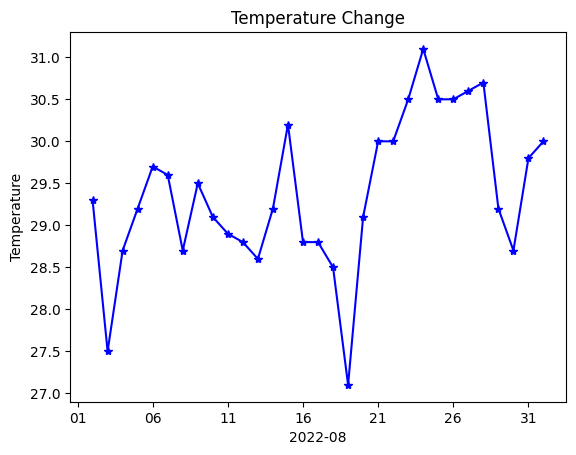

In [35]:
# 準備 x 軸資料
x = df['觀測時間(day)']
# 準備 y1 軸資料
y1 = df['氣溫(℃)']

# 折線圖
plt.plot(
    x,
    y1,
    # 設定顏色
    color='blue',
    # 設定資料點外觀
    marker='*'
)

# 設定 x 軸
plt.xlabel('2022-08')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
# 設定 y 軸
plt.ylabel('Temperature')
# 設定標題
plt.title('Temperature Change')
# 繪製溫度變化圖表
plt.show()


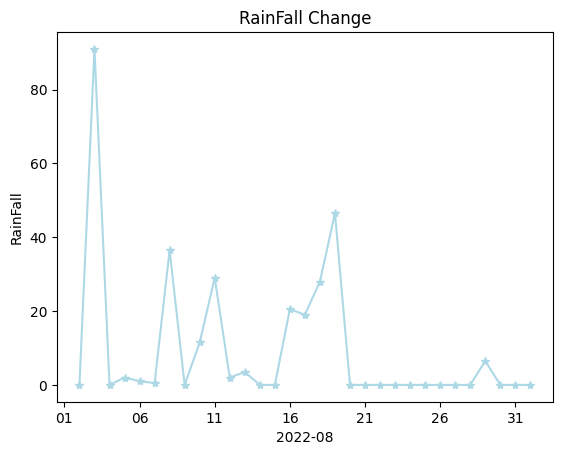

In [36]:
# 正常顯示負號
plt.rcParams['axes.unicode_minus'] = False
# 準備 x 軸資料
x = df['觀測時間(day)']
# 準備 y2 軸資料
df['降水量(mm)'] = df['降水量(mm)'].replace('T', 0).astype(float)
y2 = df['降水量(mm)']

# 折線圖
plt.plot(
    x,
    y2,
    # 設定顏色
    color='lightblue',
    # 設定資料點外觀
    marker='*'
)

# 設定 x 軸
plt.xlabel('2022-08')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
# 設定 y 軸
plt.ylabel('RainFall')
# 設定標題
plt.title('RainFall Change')
# 繪製雨量變化圖表
plt.show()

## ***matplotlib練習2***

In [37]:
def define_plot(dir: np.int64) -> int:
  if 0 <= dir and dir <= 90:
    plot = 'Q1'
  elif 90 < dir and dir <= 180:
    plot = 'Q2'
  elif 180 < dir and dir <= 270:
    plot = 'Q3'
  else:
    plot = 'Q4'
  return plot

df['雷達圖區間'] = df['風向(360degree)'].apply(define_plot)
# print(df['雷達圖區間'])

In [38]:
windSpeed = {'Q1': 0, 'Q2': 0, 'Q3': 0, 'Q4': 0}
count = {'Q1': 0, 'Q2': 0, 'Q3': 0, 'Q4': 0}
for index, row in df.iterrows():
    plot = row['雷達圖區間']
    wind = row['風速(m/s)']
    count[plot] += 1
    windSpeed[plot] += wind

# 求平均
for Q, speed in windSpeed.items():
    print(f'{Q}: {speed}')
for Q, count_val in count.items():
    print(f'{Q}: {count_val}')

Q1: 16.0
Q2: 18.2
Q3: 21.8
Q4: 17.3
Q1: 8
Q2: 7
Q3: 9
Q4: 7


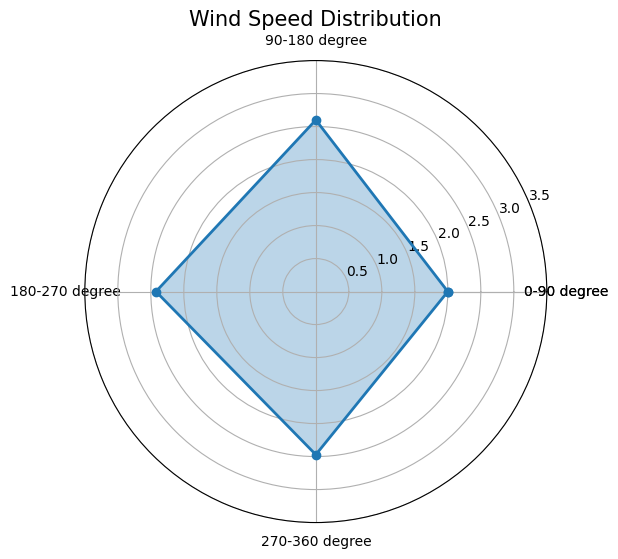

In [39]:
# 建立數據
Q1avg = windSpeed['Q1'] / count['Q1']
Q2avg = windSpeed['Q2'] / count['Q2']
Q3avg = windSpeed['Q3'] / count['Q3']
Q4avg = windSpeed['Q4'] / count['Q4']

values = [Q1avg, Q2avg, Q3avg, Q4avg]
features = ['0-90 degree','90-180 degree','180-270 degree','270-360 degree']

# 使各個數值能圍成一圓
N = len(values)
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.append(angles, angles[0])
features = np.append(features, features[0])
values = np.append(values, values[0])

# 設定圖片細節
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth = 2)
ax.fill(angles, values, alpha = 0.3)
ax.set_xticks(angles)
ax.set_ylim(top = 3.5)
ax.set_xticklabels(features)
ax.set_title('Wind Speed Distribution', color = 'black', size = 15)

# 繪製風向雷達圖
plt.show()

## ***scikit-learn***

In [40]:
# 練習 Hint

# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入 One-hot Encoder
from sklearn.preprocessing import OneHotEncoder
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('./data/train.csv')

## ***scikit-learn練習1***


In [41]:
# 取出訓練資料需要分析的資料欄位
df_x = df_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
# 取出訓練資料的答案
df_y = df_train['Survived']

In [42]:
# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='median')
age = df_x['Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)
# 填補缺失值
df_x['Age'] = imputer.transform(age)

<ipython-input-42-31c538d17406>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


In [43]:
# 類別型態資料前處理
# 創造 one-hot Encoder
onehot_enc = OneHotEncoder()
# 將向量轉換為data frame能接受的格式
sex_encoded = onehot_enc.fit_transform(df_x[['Sex']]).toarray()
df_sex_encoded = pd.DataFrame(
    sex_encoded, columns=['Sex_{}'.format(i) for i in range(sex_encoded.shape[1])]
)
df_x = pd.concat([df_x, df_sex_encoded], axis=1).drop(columns=['Sex'])

df_train['Embarked'] = df_train['Embarked'].fillna('S')
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Embarked'])
# 轉換所有類別成為數值
df_x['Embarked'] = le.transform(df_x['Embarked'])

In [44]:
# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = DecisionTreeClassifier(
    random_state=1012,
    criterion='entropy',
    max_depth = 3,
    max_leaf_nodes = 2 ** 3 )
# 訓練決策樹模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))


train accuracy: 0.8300561797752809
test accuracy: 0.8156424581005587


## ***scikit-learn練習2***

In [45]:
# 取出訓練資料需要分析的資料欄位
df_x = df_train[['Sex', 'Age', 'Fare']]
# 取出訓練資料的答案
df_y = df_train['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='median')
age = df_x['Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)
# 填補缺失值
df_x['Age'] = imputer.transform(age)

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

<ipython-input-45-f5c2a441d240>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)
<ipython-input-45-f5c2a441d240>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Sex'] = le.transform(df_x['Sex'])


### **sklearn.naive_bayes**

In [46]:
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes
from sklearn.naive_bayes import BernoulliNB  # For Bernoulli Naive Bayes

In [47]:
# 創造模型
model = GaussianNB()
# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.7752808988764045
test accuracy: 0.8044692737430168


### **sklearn.svm(Support Vector Machine)**

In [48]:
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.svm import SVC

In [49]:
# 創造模型
model = SVC(kernel='linear', probability=True)
# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.7837078651685393
test accuracy: 0.7988826815642458


### **sklearn.ensemble**

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [51]:
# 創造模型
model = RandomForestClassifier(
      criterion='gini',
      n_estimators = 850,
      min_samples_split = 11,
      min_samples_leaf = 1,
      oob_score = True,
      random_state = 1,
      n_jobs = -1)
# model = AdaBoostClassifier()
# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.9157303370786517
test accuracy: 0.7932960893854749


### **sklearn.neural_network**


In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
# 創造模型
model = MLPClassifier()
# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.7907303370786517
test accuracy: 0.8100558659217877


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **sklearn.linear_model**


In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
# 創造模型
model = LogisticRegression()
# 訓練模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.7780898876404494
test accuracy: 0.8044692737430168
